In [211]:
# Revisando el Tidy de las Codornices...
# Importando las librerías...

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [212]:
# Cargar datos
df = pd.read_csv('data/codornices.csv')
df.isnull().sum().any()

False

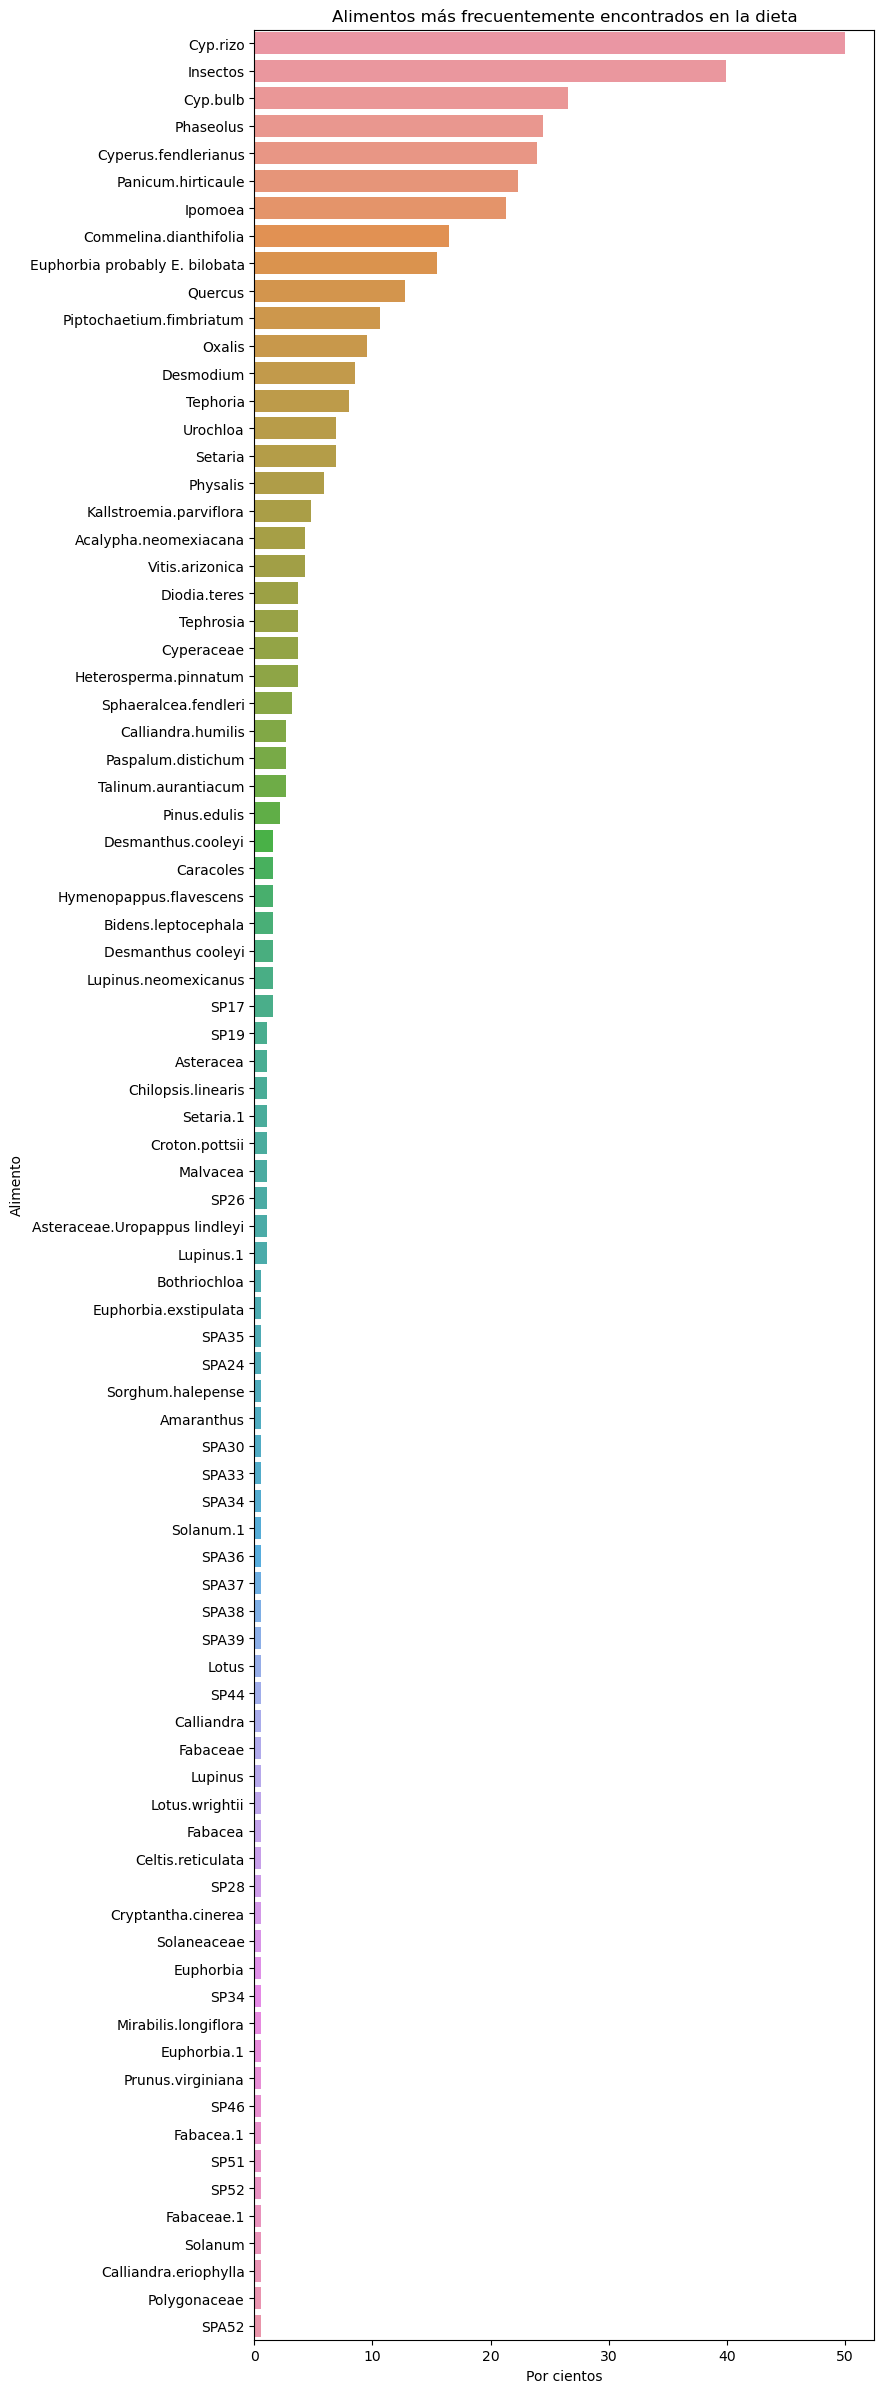

In [213]:
# ¿Cuales son los alimentos más frecuentemente encontrados en la dieta?

# Separando columnas de alimentos de las demás...
non_food_columns = ["id", "edad", "sexo", "estado", "peso total", "time", "covey",
                    "dist camino", "ppanual17", "tmedia17", "altitud", "lat", "lon",
                    "hcrop", "hland", "gap", "year"]

food_columns = [columna for columna in df.columns if columna not in non_food_columns]

# Dicotomizar los valores de las columnas de alimentos a valores cualitativos (True / False)...
df_cualit = df.copy()
df_cualit[food_columns] = df_cualit[food_columns].applymap(lambda x: True if x > 0 else False)

# Eliminar columnas de alimentos que no se consumieron...
food_columns_list = pd.DataFrame(df_cualit[food_columns].sum() != 0).reset_index()
food_columns_list.columns = ["Alimento", "Cantidad"]
food_columns_false = list(food_columns_list.loc[food_columns_list["Cantidad"] == False, "Alimento"])

df_cualit = df_cualit.drop(columns=food_columns_false)

# crear lista de comidas nuevamente... pero a parir del df_cualit...
food_columns = [columna for columna in df_cualit.columns if columna not in non_food_columns]

# foods_df_cualit = pd.DataFrame(df_cualit[food_columns].sum()).reset_index(drop = False)
foods_df_cualit = pd.DataFrame(df_cualit[food_columns].sum() / len(df_cualit) * 100).reset_index(drop=False)

foods_df_cualit.columns = ["Alimento", "Cantidad"]
foods_df_cualit.sort_values(by="Cantidad", ascending=False, inplace=True)
foods_df_cualit

# Graficando las Comidas más frecuentes...
plt.figure(figsize=(8, 30))
sns.barplot(x = "Cantidad", y = "Alimento", data = foods_df_cualit,)
plt.title("Alimentos más frecuentemente encontrados en la dieta")
plt.xlabel("Por cientos")
plt.show()

Promedio total de alimentos por individuo: 4.0


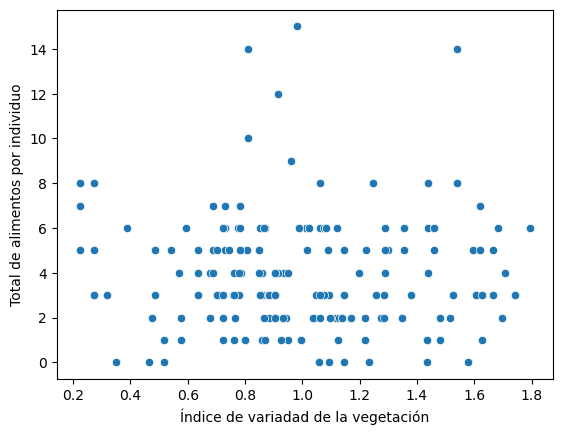

In [228]:
# ¿Cuál es el número pronmedio de alimentos encontrados en un buche?
promedio_total = np.mean(df_cualit[food_columns].sum(axis=1)).round()
print(f"Promedio total de alimentos por individuo: {promedio_total}")

# ¿Existe relación con el índice de variedad de la vegetación? Suena lógico... pero hay que verlo...
df_cualit["total_alimentos"] = df_cualit[food_columns].sum(axis=1)

sns.scatterplot(x = "hland", y = "total_alimentos", data = df_cualit)
plt.xlabel("Índice de variadad de la vegetación")
plt.ylabel("Total de alimentos por individuo")
plt.show()

# Pareciera que no???

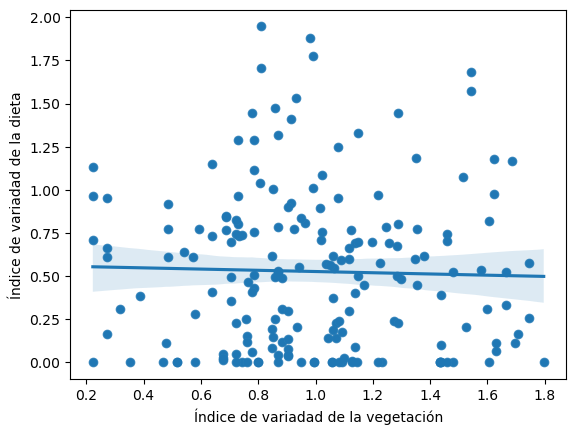

In [232]:
# Gráfico de dispersión del índice de variedad de la vegetación y el índice de variedad de la dieta...
sns.scatterplot(x = "hland", y = "hcrop", data = df_cualit)
sns.regplot(x="hland", y="hcrop", data=df_cualit)
plt.xlabel("Índice de variadad de la vegetación")
plt.ylabel("Índice de variadad de la dieta")
plt.show()

# Definitivamente no parece haber relación lienal...